In [ ]:
# 📌 1️⃣ Setup
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

from planner.simulation import simulate_drone_energy_data
from planner.ml_predictor import train_energy_predictor, load_energy_predictor
from planner.path_planner import plan_energy_efficient_path
from planner.database import init_db, insert_path, query_paths_by_energy

print("✅ Environment ready")

# 📌 2️⃣ Initialize the database
init_db()
print("Database initialized with 'paths' table.")

In [ ]:
# 📌 2️⃣ Generate and Inspect Synthetic Drone Energy Data
simulate_drone_energy_data(num_samples=5000)

df = pd.read_csv("data/simulated_drone_energy.csv")
print(df.head())
print(df.describe())

df.hist(figsize=(12, 8))
plt.show()


In [ ]:
# 📌 3️⃣ Train ML Model and Evaluate
train_energy_predictor()
model = load_energy_predictor()
print("✅ ML model loaded")


In [ ]:
# 📌 4️⃣ Test Energy Prediction
speed = 5  # m/s
acceleration = 0  # m/s^2
altitude = 10  # m

predicted_power = model.predict([[speed, acceleration, altitude]])[0]
print(f"Predicted Power: {predicted_power:.2f} W")


In [ ]:
# 📌 5️⃣ Plan an Energy-Efficient Path
start = (0, 0)
goal = (10, 10)

path = plan_energy_efficient_path(start, goal, model)
print("Planned Path:", path)


In [ ]:
# 📌 6️⃣ Visualize the Planned Path
path_array = np.array(path)

plt.figure(figsize=(6, 6))
plt.plot(path_array[:, 0], path_array[:, 1], marker='o')
plt.title("Energy-Efficient Drone Path")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


In [ ]:
# 📌 7️⃣ Test Database Logging and Query
import json

results = query_paths_by_energy(max_energy=50)
print("Paths with total energy <= 50:")
for r in results:
    path_json = r[1]
    path_list = json.loads(path_json)
    print(f"ID: {r[0]}, Path: {path_list}, Total Energy: {r[2]:.2f} W")


In [ ]:
import ast


Imports done.
Previous database removed.
Database initialized.
Simulated dataset saved to data/simulated_drone_energy.csv
Drone energy simulation data generated.
Model training complete. Test R^2: 1.00
Model saved to drone_energy_model.pkl
Energy prediction model trained and saved.
Energy prediction model loaded.
Step: (1, 1), Predicted Power: 11.53 W
Step: (2, 2), Predicted Power: 11.53 W
Step: (3, 3), Predicted Power: 11.53 W
Step: (4, 4), Predicted Power: 11.53 W
Step: (5, 5), Predicted Power: 11.53 W
Step: (6, 6), Predicted Power: 11.53 W
Step: (7, 7), Predicted Power: 11.53 W
Step: (8, 8), Predicted Power: 11.53 W
Step: (9, 9), Predicted Power: 11.53 W
Step: (10, 10), Predicted Power: 11.53 W
Planned Path: [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]]
Estimated total energy for planned path: 68.45 W
Planned path inserted into database.
Paths with total energy <= 80:
ID: 1, Path: [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [

C:\Users\Wilson\anaconda3\envs\pt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Wilson\anaconda3\envs\pt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Wilson\anaconda3\envs\pt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Wilson\anaconda3\envs\pt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Wilson\anaconda3\envs\pt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor wa

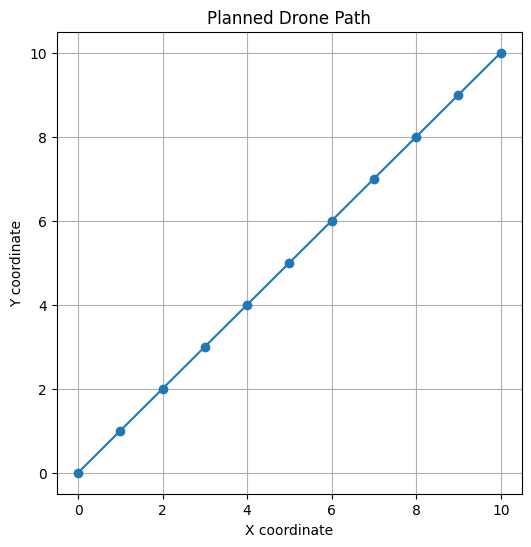

In [3]:
# 📌 ml_drone_path_debug.ipynb
# ML-Powered Energy-Efficient Drone Path Planner — Full Pipeline Test

# -- 1️⃣ Imports and Initialization --

import numpy as np
import pandas as pd
import json
import os

from planner.simulation import simulate_drone_energy_data
from planner.ml_predictor import train_energy_predictor, load_energy_predictor
from planner.path_planner import plan_energy_efficient_path
from planner.database import init_db, insert_path, query_paths_by_energy

print("Imports done.")

# -- 2️⃣ Clean previous database if exists and initialize --

db_path = "drone_paths.db"
if os.path.exists(db_path):
    os.remove(db_path)
    print("Previous database removed.")

init_db()
print("Database initialized.")

# -- 3️⃣ Simulate drone energy data --

simulate_drone_energy_data(num_samples=5000)
print("Drone energy simulation data generated.")

# -- 4️⃣ Train ML energy prediction model --

train_energy_predictor()
print("Energy prediction model trained and saved.")

# -- 5️⃣ Load trained ML model --

model = load_energy_predictor()
print("Energy prediction model loaded.")

# -- 6️⃣ Plan a test path --

start = (0, 0)
goal = (10, 10)

path = plan_energy_efficient_path(start, goal, model)
print(f"Planned Path: {path}")

# -- 7️⃣ Calculate estimated total energy for planned path --

# For simplicity, estimate energy for each step as a fixed prediction
step_energy = model.predict([[5, 0, 10]])[0]
total_energy = step_energy * len(path)

print(f"Estimated total energy for planned path: {total_energy:.2f} W")

# -- 8️⃣ Insert planned path and energy into database --

insert_path(path, total_energy)
print("Planned path inserted into database.")

# -- 9️⃣ Query paths by energy threshold --

max_energy = 80
results = query_paths_by_energy(max_energy=max_energy)

print(f"Paths with total energy <= {max_energy}:")
if results:
    for r in results:
        path_json = r[1]
        path_list = json.loads(path_json)
        print(f"ID: {r[0]}, Path: {path_list}, Total Energy: {r[2]:.2f} W")
else:
    print("No paths found within this energy limit.")

# -- 10️⃣ Optional: Visualize path (basic matplotlib plot) --

import matplotlib.pyplot as plt

xs = [pos[0] for pos in path]
ys = [pos[1] for pos in path]

plt.figure(figsize=(6,6))
plt.plot(xs, ys, marker='o')
plt.title("Planned Drone Path")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True)
plt.show()
